In [16]:
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import re
from datetime import datetime,date,timedelta
from scipy.io import loadmat
from pathlib import Path
# import shutil
# from scipy.io import savemat
# from scipy.fft import fft
# from scipy.interpolate import interp1d

In [17]:
# some processing functions
def yesterday():
    Y = date.today()-timedelta(days=1)
    return Y.strftime('%Y_%#m_%#d')

In [22]:
# basic settings

parent_foldername = 'autotest'
folderpwd = 'D:' + os.sep + '震動資料' + os.sep + parent_foldername +os.sep+yesterday()
recordpwd = folderpwd + os.sep + 'runrecord.txt'
diarypwd = folderpwd + os.sep + 'diary.txt'
files = [f for f in os.listdir(folderpwd) if os.path.isfile(os.path.join(folderpwd, f))]
mat_files = [files[i] for i in range(len(files)) if ('.mat' in files[i])]

In [40]:
# get time order
X = np.array([])
L = [];

# trans name to time stamp
for i in range(len(mat_files)):
    T = mat_files[i]
    current_stamp = time.mktime(datetime.strptime(T[:-4],"%Y_%m_%d_%H_%M_%S").timetuple())
    L.append(current_stamp)

L = sorted(range(len(L)),key=lambda k:L[k])
L = np.array(L)

# concatenate datas
for i in range(len(L)):
    mat = loadmat(folderpwd+os.sep+mat_files[L[i]] )
    FX2 = np.array(mat['FX2'])
    FY2 = np.array(mat['FY2'])
    FZ2 = np.array(mat['FZ2'])
    if i==0:
        X=FX2
        Y=FY2
        Z=FZ2
    else:
        np.concatenate((X,FX2),axis=0)
        np.concatenate((Y,FY2),axis=0)
        np.concatenate((Z,FZ2),axis=0)

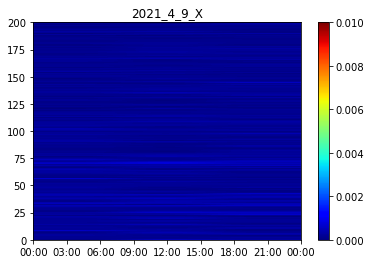

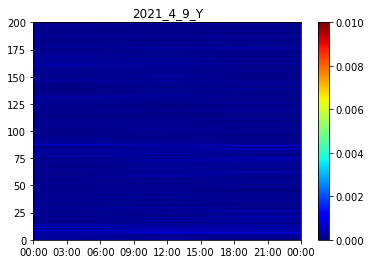

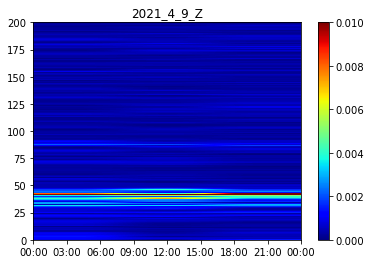

In [44]:
# plot figures

Amp_max = 0.01

tlen = len(FX2)
time_label_list = ['00:00', '03:00', '06:00', '09:00', '12:00', 
                   '15:00', '18:00', '21:00', '00:00']
Ttick = np.linspace(0,tlen,9)
Day = mat_files[1]
Day = Day[:8]

# plot time-freq for each axis
figX, axX = plt.subplots()
img = axX.imshow(np.matrix.transpose(np.array(FX2)), cmap = 'jet', vmin = 0, vmax = Amp_max,
                    aspect = 'auto', origin = 'lower', extent = [0,tlen,0,200])
axX.set_xticks(Ttick)
axX.set_xticklabels(time_label_list)
figX.colorbar(img)
figname = Day + '_X'
axX.title.set_text(figname)
plt.savefig(folderpwd+os.sep+figname,dpi=600)

figY, axY = plt.subplots()
img = axY.imshow(np.matrix.transpose(np.array(FY2)), cmap = 'jet', vmin = 0, vmax = Amp_max,
                 aspect = 'auto', origin = 'lower', extent = [0,tlen,0,200])
axY.set_xticks(Ttick)
axY.set_xticklabels(time_label_list)
figY.colorbar(img)
figname = Day + '_Y'
axY.title.set_text(figname)
plt.savefig(folderpwd+os.sep+figname,dpi=600)
    
figZ, axZ = plt.subplots()
img = axZ.imshow(np.matrix.transpose(np.array(FZ2)), cmap = 'jet', vmin = 0, vmax = Amp_max,
                 aspect = 'auto', origin = 'lower', extent = [0,tlen,0,200])
axZ.set_xticks(Ttick)
axZ.set_xticklabels(time_label_list)
figZ.colorbar(img)
figname = Day + '_Z'
axZ.title.set_text(figname)
plt.savefig(folderpwd+os.sep+figname,dpi=600)

In [31]:
print(sorted(range(len(mat_files)), key=lambda k: mat_files[k]))

[0, 1]


In [35]:
tmp = mat_files[1]
print(tmp[:8])

2021_4_9
